In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

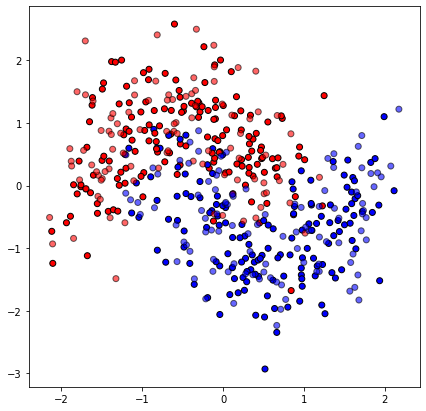

In [2]:
# moon dataset
dfmoon = make_moons(noise=0.3, random_state=0, n_samples=500)
X, y = dfmoon
X = StandardScaler().fit_transform(X)
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
cm = plt.cm.RdBu # for the contour map
cm_bright = ListedColormap(['#FF0000', '#0000FF']) # for the dots


# Plot the training points
plt.figure(figsize=(7,7))
# red for y=0, blue for y=1
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

In [3]:
# choose the best parameters for SVC through GridSearchCV

tuned_parameters_svc = [{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100],
                             'C': [1, 5, 10, 50, 100]}]

# use 3 scores from sklearn.metrics: precision = metrics.precision_score (= PPV)
#                                    recall = metrics.recall_score (= sensitivity)
#                                    accuracy = error rate
# for precision and recall, the default positive refers to y=1, meaning blue
# accuracy is not affected
scores_blue = ['precision', 'recall', 'accuracy']
scores_red = {'precision': make_scorer(precision_score, pos_label=0),
              'recall': make_scorer(recall_score, pos_label=0), 
              'accuracy': make_scorer(accuracy_score)}

# make decision based on accuracy
clf_svc_acc = GridSearchCV(SVC(), tuned_parameters_svc, refit='accuracy',
                       cv=5, scoring=scores_blue)
clf_svc_acc.fit(X_train, y_train)

print("The best parameters based on accuracy is:", clf_svc_acc.best_params_) 
result_svc_acc = pd.DataFrame(clf_svc_acc.cv_results_)
result_svc_acc = result_svc_acc.sort_values(by='mean_test_accuracy', ascending=False)
result_svc_acc[['mean_test_precision', 'mean_test_recall', 'mean_test_accuracy', 
               'param_C', 'param_gamma', 'param_kernel']].round(3)

The best parameters based on accuracy is: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}


,mean_test_precision,mean_test_recall,mean_test_accuracy,param_C,param_gamma,param_kernel
12,0.942,0.862,0.907,10,1,rbf
3,0.936,0.869,0.907,1,10,rbf
22,0.941,0.862,0.907,100,1,rbf
7,0.935,0.862,0.903,5,1,rbf
2,0.923,0.876,0.903,1,1,rbf
17,0.929,0.869,0.903,50,1,rbf
11,0.938,0.855,0.900,10,0.1,rbf
16,0.929,0.855,0.897,50,0.1,rbf
6,0.938,0.848,0.897,5,0.1,rbf
21,0.921,0.855,0.893,100,0.1,rbf


Classification report based on training data:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       155
           1       0.94      0.90      0.92       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Classification report based on testing data:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87        95
           1       0.92      0.84      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

    0   1
0  87   8
1  17  88


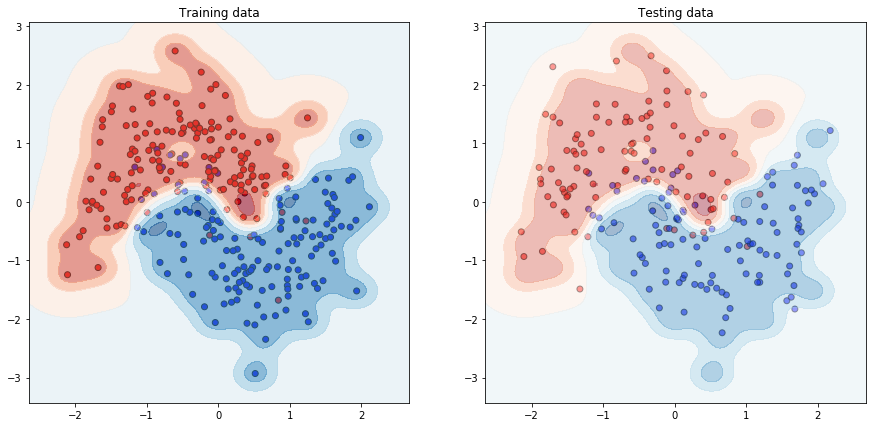

In [4]:
## the best model for SVC based on accuracy in training data is: SVC(C=1, gamma=10, kernel='rbf')
clf_svc_model_acc = SVC(C=1, gamma=10, kernel='rbf')
clf_svc_model_acc.fit(X_train, y_train)
print("Classification report based on training data:")
print(classification_report(y_train, clf_svc_model_acc.predict(X_train))) 
#training accuracy=0.93

# then use test set for prediction
y_true, y_pred = y_test, clf_svc_model_acc.predict(X_test)
print("Classification report based on testing data:")
print(classification_report(y_true, y_pred)) 
#test accuracy=0.88

print(pd.DataFrame(confusion_matrix(y_true, y_pred))) 

# plot the best model
plt.figure(1, figsize=(15,7))
plt.subplot(1, 2, 1)
plt.title('Training data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
Z = clf_svc_model_acc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title('Testing data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
Z = clf_svc_model_acc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.4)

In [5]:
# make decision based on recall(sensitivity) for blue
clf_svc_recb = GridSearchCV(SVC(), tuned_parameters_svc, refit='recall',
                       cv=5, scoring=scores_blue)
clf_svc_recb.fit(X_train, y_train)

print("The best parameters based on recall(blue) is:", clf_svc_recb.best_params_) 
result_svc_recb = pd.DataFrame(clf_svc_recb.cv_results_)
result_svc_recb = result_svc_recb.sort_values(by='mean_test_recall', ascending=False)
result_svc_recb[['mean_test_precision', 'mean_test_recall', 'mean_test_accuracy', 
               'param_C', 'param_gamma', 'param_kernel']].round(3).head()

The best parameters based on recall(blue) is: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


,mean_test_precision,mean_test_recall,mean_test_accuracy,param_C,param_gamma,param_kernel
2,0.923,0.876,0.903,1,1,rbf
3,0.936,0.869,0.907,1,10,rbf
17,0.929,0.869,0.903,50,1,rbf
12,0.942,0.862,0.907,10,1,rbf
7,0.935,0.862,0.903,5,1,rbf


In [6]:
# make decision based on recall(sensitivity) for red
clf_svc_recr = GridSearchCV(SVC(), tuned_parameters_svc, refit='recall',
                       cv=5, scoring=scores_red)
clf_svc_recr.fit(X_train, y_train)

print("The best parameters based on recall(red) is:", clf_svc_recr.best_params_) 
result_svc_recr = pd.DataFrame(clf_svc_recr.cv_results_)
result_svc_recr = result_svc_recr.sort_values(by='mean_test_recall', ascending=False)
result_svc_recr[['mean_test_precision', 'mean_test_recall', 'mean_test_accuracy', 
               'param_C', 'param_gamma', 'param_kernel']].round(3).head()

The best parameters based on recall(red) is: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


,mean_test_precision,mean_test_recall,mean_test_accuracy,param_C,param_gamma,param_kernel
12,0.882,0.948,0.907,10,1,rbf
22,0.884,0.948,0.907,100,1,rbf
7,0.881,0.942,0.903,5,1,rbf
11,0.880,0.942,0.900,10,0.1,rbf
3,0.890,0.942,0.907,1,10,rbf


In [7]:
# compare between several models:
## the best model for SVC based on accuracy: SVC(C=1, gamma=10, kernel='rbf')
clf_svc_model_acc = SVC(C=1, gamma=10, kernel='rbf')
clf_svc_model_acc.fit(X_train, y_train)
print("Classification report based on training data:")
print(classification_report(y_train, clf_svc_model_acc.predict(X_train))) 
#training accuracy=0.93
# then use test set for prediction
y_true_acc, y_pred_acc = y_test, clf_svc_model_acc.predict(X_test)
print("Classification report based on testing data:")
print(classification_report(y_true_acc, y_pred_acc)) 
#test accuracy=0.88
print(pd.DataFrame(confusion_matrix(y_true_acc, y_pred_acc))) 

## the best model for SVC based on recall(blue): SVC(C=1, gamma=1, kernel='rbf')
clf_svc_model_recb = SVC(C=1, gamma=1, kernel='rbf')
clf_svc_model_recb.fit(X_train, y_train)
print("Classification report based on training data:")
print(classification_report(y_train, clf_svc_model_recb.predict(X_train))) 
# then use test set for prediction
y_true_recb, y_pred_recb = y_test, clf_svc_model_recb.predict(X_test)
print("Classification report based on testing data:")
print(classification_report(y_true_recb, y_pred_recb)) 
print(pd.DataFrame(confusion_matrix(y_true_recb, y_pred_recb))) 

## the best model for SVC based on recall(red): SVC(C=10, gamma=1, kernel='rbf')
clf_svc_model_recr = SVC(C=10, gamma=1, kernel='rbf')
clf_svc_model_recr.fit(X_train, y_train)
print("Classification report based on training data:")
print(classification_report(y_train, clf_svc_model_recr.predict(X_train))) 
# then use test set for prediction
y_true_recr, y_pred_recr = y_test, clf_svc_model_recr.predict(X_test)
print("Classification report based on testing data:")
print(classification_report(y_true_recb, y_pred_recr)) 
print(pd.DataFrame(confusion_matrix(y_true_recr, y_pred_recr))) 


Classification report based on training data:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       155
           1       0.94      0.90      0.92       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Classification report based on testing data:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87        95
           1       0.92      0.84      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

    0   1
0  87   8
1  17  88
Classification report based on training data:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       155
           1       0.93      0.88      0.90       145

    accuracy   

In [8]:
# choose the best parameters for KNN through GridSearchCV

tuned_parameters_knn = {'n_neighbors': [1, 3, 5, 7, 10, 20, 50, 100]}

scores = ['precision', 'recall', 'accuracy']

# make decision based on accuracy
clf_knn = GridSearchCV(KNeighborsClassifier(), tuned_parameters_knn, refit='accuracy',
                       cv=5, scoring=scores)
clf_knn.fit(X_train, y_train)

print(clf_knn.best_params_) 
result_knn = pd.DataFrame(clf_knn.cv_results_)
result_knn = result_knn.sort_values(by='mean_test_accuracy', ascending=False)
result_knn[['mean_test_precision', 'mean_test_recall', 'mean_test_accuracy', 
         'param_n_neighbors']].round(3)

{'n_neighbors': 5}


,mean_test_precision,mean_test_recall,mean_test_accuracy,param_n_neighbors
2,0.931,0.883,0.910,5
4,0.943,0.869,0.910,10
3,0.929,0.869,0.903,7
5,0.943,0.855,0.903,20
1,0.904,0.890,0.900,3
6,0.943,0.841,0.897,50
7,0.904,0.828,0.870,100
0,0.869,0.848,0.863,1


Classification report based on training data:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       155
           1       0.95      0.88      0.91       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Classification report based on testing data:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87        95
           1       0.92      0.84      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



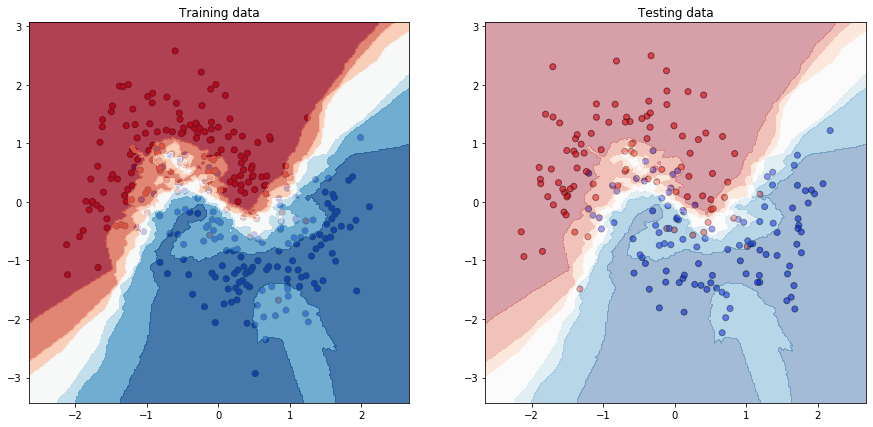

In [9]:
## the best model for KNN based on training data is: KNeighborsClassifier(10)
clf_knn_model = KNeighborsClassifier(10)
clf_knn_model.fit(X_train, y_train)
print("Classification report based on training data:")
print(classification_report(y_train, clf_knn_model.predict(X_train))) #training accuracy=0.92

# then use test set for prediction
y_true, y_pred = y_test, clf_knn_model.predict(X_test)
print("Classification report based on testing data:")
print(classification_report(y_true, y_pred)) #test accuracy=0.88

# plot the best model
plt.figure(1, figsize=(15,7))
plt.subplot(1, 2, 1)
plt.title('Training data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
Z = clf_knn_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

plt.subplot(1, 2, 2)
plt.title('Testing data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
Z = clf_knn_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.4)

In [10]:
# choose the best parameters for decision tree through GridSearchCV

tuned_parameters_dt = {'max_depth': [1, 2, 3, 4, 5, 7, 10, 20]}

scores = ['precision', 'recall', 'accuracy']

# make decision based on accuracy
clf_dt = GridSearchCV(DecisionTreeClassifier(), tuned_parameters_dt, refit='accuracy',
                      cv=5, scoring=scores)
clf_dt.fit(X_train, y_train)

print(clf_dt.best_params_) 
result_dt = pd.DataFrame(clf_dt.cv_results_)
result_dt = result_dt.sort_values(by='mean_test_accuracy', ascending=False)
result_dt[['mean_test_precision', 'mean_test_recall', 'mean_test_accuracy', 
         'param_max_depth']].round(3)

{'max_depth': 2}


,mean_test_precision,mean_test_recall,mean_test_accuracy,param_max_depth
1,0.922,0.855,0.893,2
2,0.921,0.848,0.890,3
3,0.904,0.821,0.870,4
6,0.875,0.855,0.870,10
5,0.879,0.834,0.863,7
4,0.887,0.807,0.857,5
7,0.874,0.828,0.857,20
0,0.804,0.814,0.813,1


Classification report based on training data:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       155
           1       0.92      0.90      0.91       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Classification report based on testing data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        95
           1       0.86      0.87      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



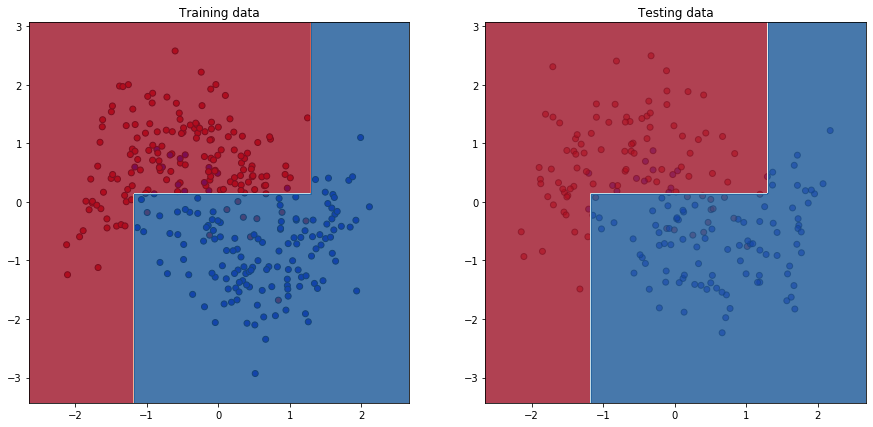

In [11]:
## the best model for DT based on training data is: DecisionTreeClassifier(max_depth=2)
clf_dt_model = DecisionTreeClassifier(max_depth=2)
clf_dt_model.fit(X_train, y_train)
print("Classification report based on training data:")
print(classification_report(y_train, clf_dt_model.predict(X_train))) #training accuracy=1.0

# then use test set for prediction
y_true, y_pred = y_test, clf_dt_model.predict(X_test)
print("Classification report based on testing data:")
print(classification_report(y_true, y_pred)) #test accuracy=0.84

# plot the best model
plt.figure(1, figsize=(15,7))
plt.subplot(1, 2, 1)
plt.title('Training data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
Z = clf_dt_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

plt.subplot(1, 2, 2)
plt.title('Testing data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
Z = clf_dt_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

In [18]:
# choose between 3 models through cross_val_score (based on accuracy)
clf_svc_score = cross_val_score(clf_svc_model_acc, X_train, y_train, cv=5, scoring='accuracy')
clf_knn_score = cross_val_score(clf_knn_model, X_train, y_train, cv=5, scoring='accuracy')
clf_dt_score = cross_val_score(clf_dt_model, X_train, y_train, cv=5, scoring='accuracy')

print("SVC: %0.3f and %r" % (clf_svc_score.mean(), clf_svc_score.round(3)))
print("KNN: %0.3f and %r" % (clf_knn_score.mean(), clf_knn_score.round(3)))
print("DT: %0.3f and %r" % (clf_dt_score.mean(), clf_dt_score.round(3)))

SVC: 0.907 and array([0.933, 0.9  , 0.9  , 0.95 , 0.85 ])
KNN: 0.910 and array([0.9 , 0.9 , 0.9 , 0.95, 0.9 ])
DT: 0.893 and array([0.9  , 0.883, 0.883, 0.917, 0.883])


In [13]:
# choose between 3 models through cross_val_score (based on accuracy), cv=3
clf_svc_score = cross_val_score(clf_svc_model_acc, X_train, y_train, cv=3, scoring='accuracy')
clf_knn_score = cross_val_score(clf_knn_model, X_train, y_train, cv=3, scoring='accuracy')
clf_dt_score = cross_val_score(clf_dt_model, X_train, y_train, cv=3, scoring='accuracy')

print("SVC: %0.3f and %r" % (clf_svc_score.mean(), clf_svc_score.round(3)))
print("KNN: %0.3f and %r" % (clf_knn_score.mean(), clf_knn_score.round(3)))
print("DT: %0.3f and %r" % (clf_dt_score.mean(), clf_dt_score.round(3)))

SVC: 0.900 and array([0.931, 0.88 , 0.889])
KNN: 0.910 and array([0.921, 0.89 , 0.919])
DT: 0.890 and array([0.901, 0.85 , 0.919])


In [14]:
# choose between 3 models through cross_val_score (based on accuracy), cv=10
clf_svc_score = cross_val_score(clf_svc_model_acc, X_train, y_train, cv=10, scoring='accuracy')
clf_knn_score = cross_val_score(clf_knn_model, X_train, y_train, cv=10, scoring='accuracy')
clf_dt_score = cross_val_score(clf_dt_model, X_train, y_train, cv=10, scoring='accuracy')

print("SVC: %0.3f and %r" % (clf_svc_score.mean(), clf_svc_score.round(3)))
print("KNN: %0.3f and %r" % (clf_knn_score.mean(), clf_knn_score.round(3)))
print("DT: %0.3f and %r" % (clf_dt_score.mean(), clf_dt_score.round(3)))

SVC: 0.903 and array([0.903, 0.968, 0.903, 0.903, 0.839, 0.931, 0.897, 0.966, 0.897,
       0.828])
KNN: 0.914 and array([0.871, 0.968, 0.903, 0.903, 0.839, 0.966, 0.931, 1.   , 0.862,
       0.897])
DT: 0.871 and array([0.774, 0.903, 0.871, 0.839, 0.839, 0.931, 0.828, 0.966, 0.897,
       0.862])
